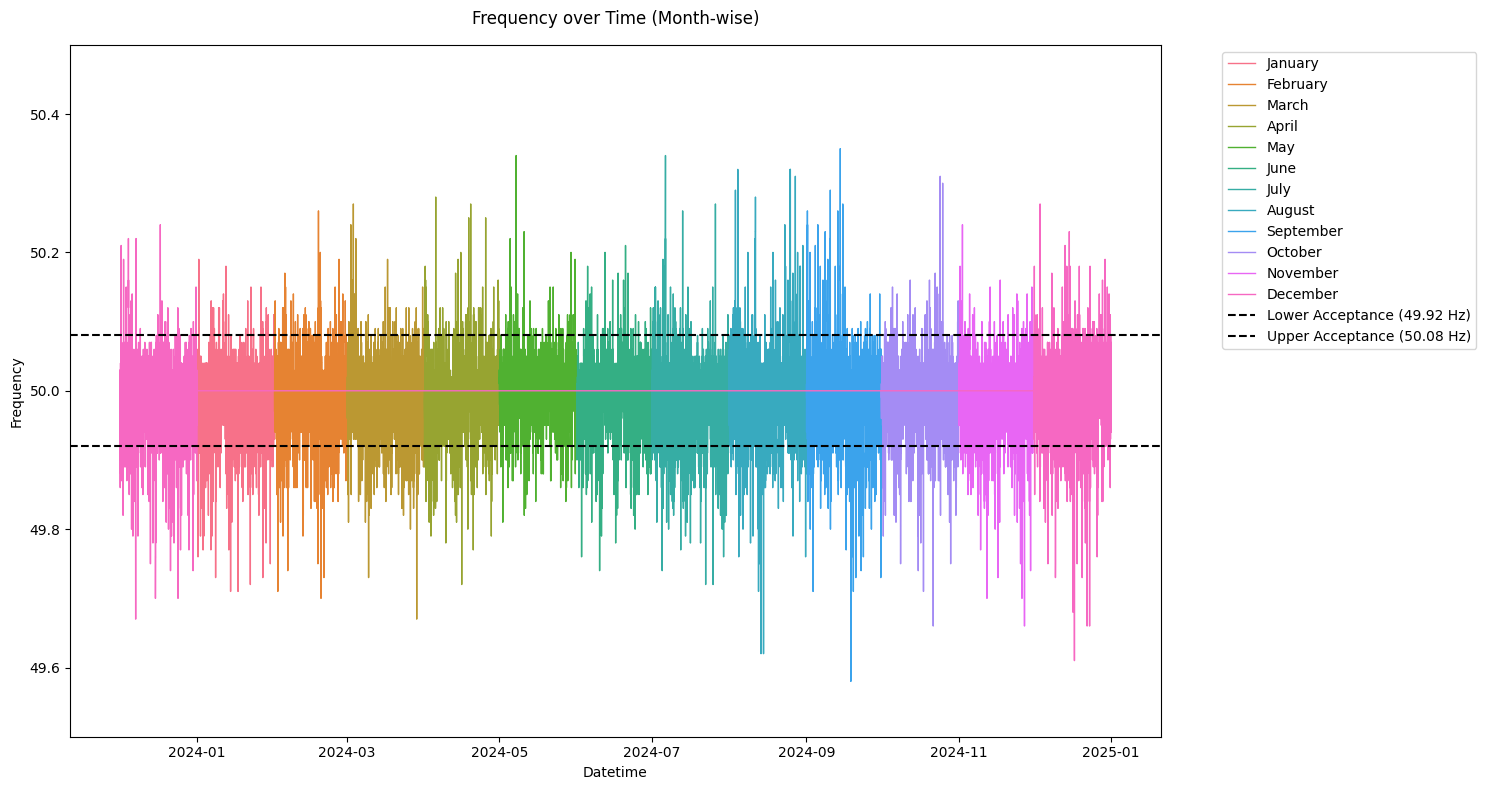

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#please change path of the Data set in the below line code , as per the requirment of the environment to run the code
df = pd.read_csv('Data_set.csv')

df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

plt.figure(figsize=(15, 8))

months = range(1, 13)
colors = sns.color_palette('husl', n_colors=12)
month_colors = dict(zip(months, colors))

# Plot data for each month
for month in months:
    mask = df['DateTime'].dt.month == month
    month_data = df[mask]
    if not month_data.empty:
        plt.plot(month_data['DateTime'],
                month_data['Value'],
                label=datetime.strptime(str(month), "%m").strftime("%B"),
                color=month_colors[month],
                linewidth=1)


plt.axhline(y=49.92, color='black', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='black', linestyle='--', label='Upper Acceptance (50.08 Hz)')

plt.title('Frequency over Time (Month-wise)', pad=15)
plt.xlabel('Datetime')
plt.ylabel('Frequency')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(49.5, 50.5)

plt.tight_layout()

plt.savefig('frequency_plot.png', bbox_inches='tight', dpi=300)
plt.show()

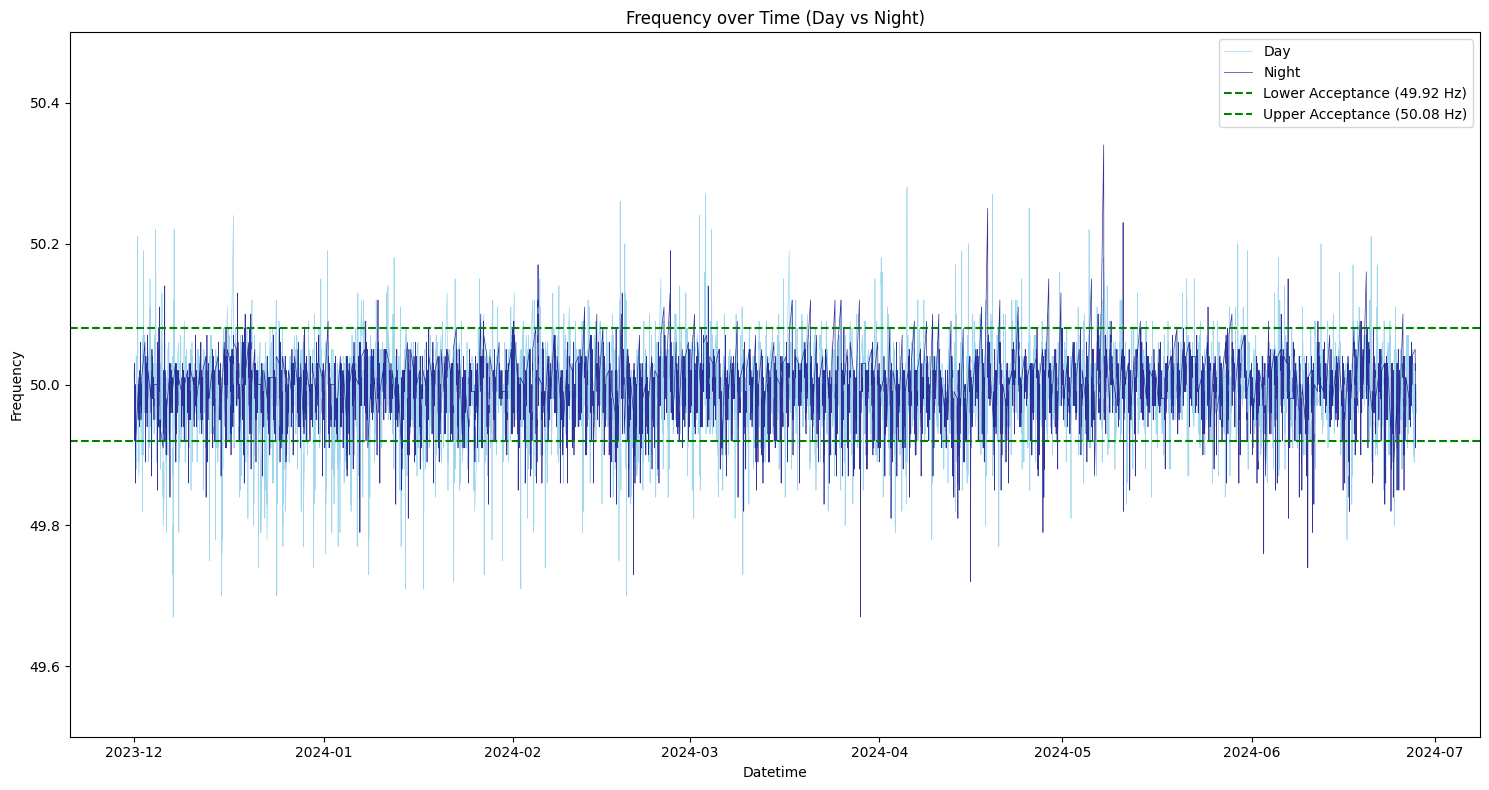

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Data_set.csv')

df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

df['Hour'] = df['DateTime'].dt.hour

df['is_day'] = (df['Hour'] >= 6) & (df['Hour'] < 18)

plt.figure(figsize=(15, 8))

day_data = df[df['is_day']]
night_data = df[~df['is_day']]

plt.plot(day_data['DateTime'], day_data['Value'],
         color='skyblue', label='Day', alpha=0.8, linewidth=0.5)
plt.plot(night_data['DateTime'], night_data['Value'],
         color='navy', label='Night', alpha=0.8, linewidth=0.5)

plt.axhline(y=49.92, color='green', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')

plt.title('Frequency over Time (Day vs Night)')
plt.xlabel('Datetime')
plt.ylabel('Frequency')

plt.ylim(49.5, 50.5)

plt.legend()

plt.tight_layout()

plt.savefig('frequency_day_night_plot.png', dpi=300, bbox_inches='tight')
plt.show()

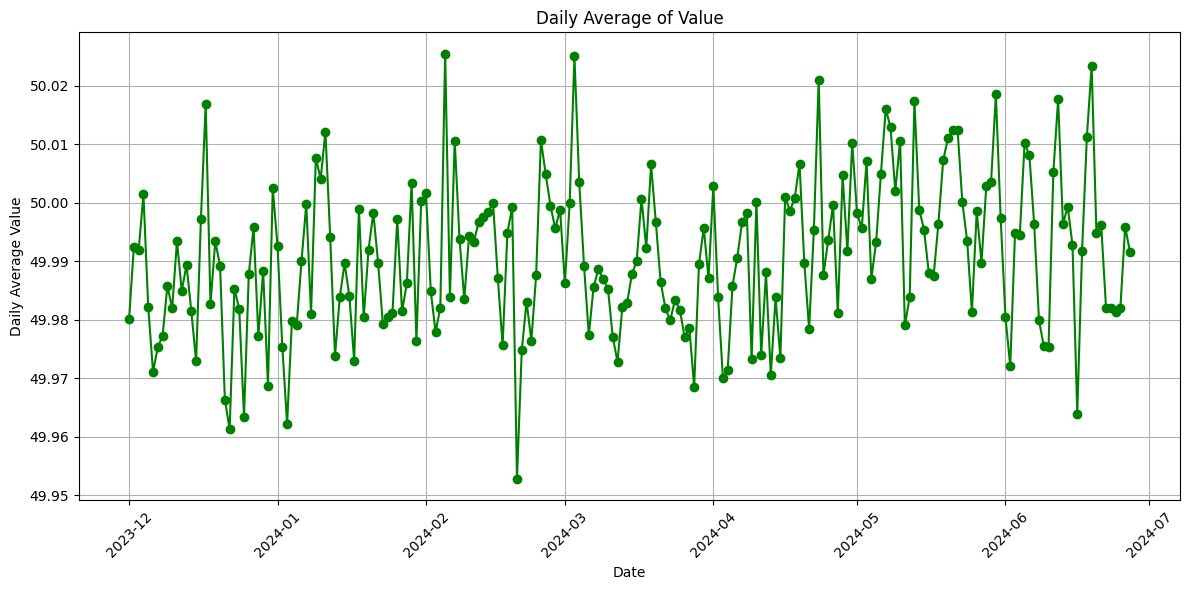

Daily average value plot created


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['DateTime'] = pd.to_datetime(df['DateTime'])

daily_df = df.groupby(df['DateTime'].dt.date)['Value'].mean().reset_index()
daily_df.columns = ['Date', 'DailyMean']

plt.figure(figsize=(12, 6))
plt.plot(daily_df['Date'], daily_df['DailyMean'], marker='o', linestyle='-', color='green')
plt.title('Daily Average of Value')
plt.xlabel('Date')
plt.ylabel('Daily Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print('Daily average value plot created')

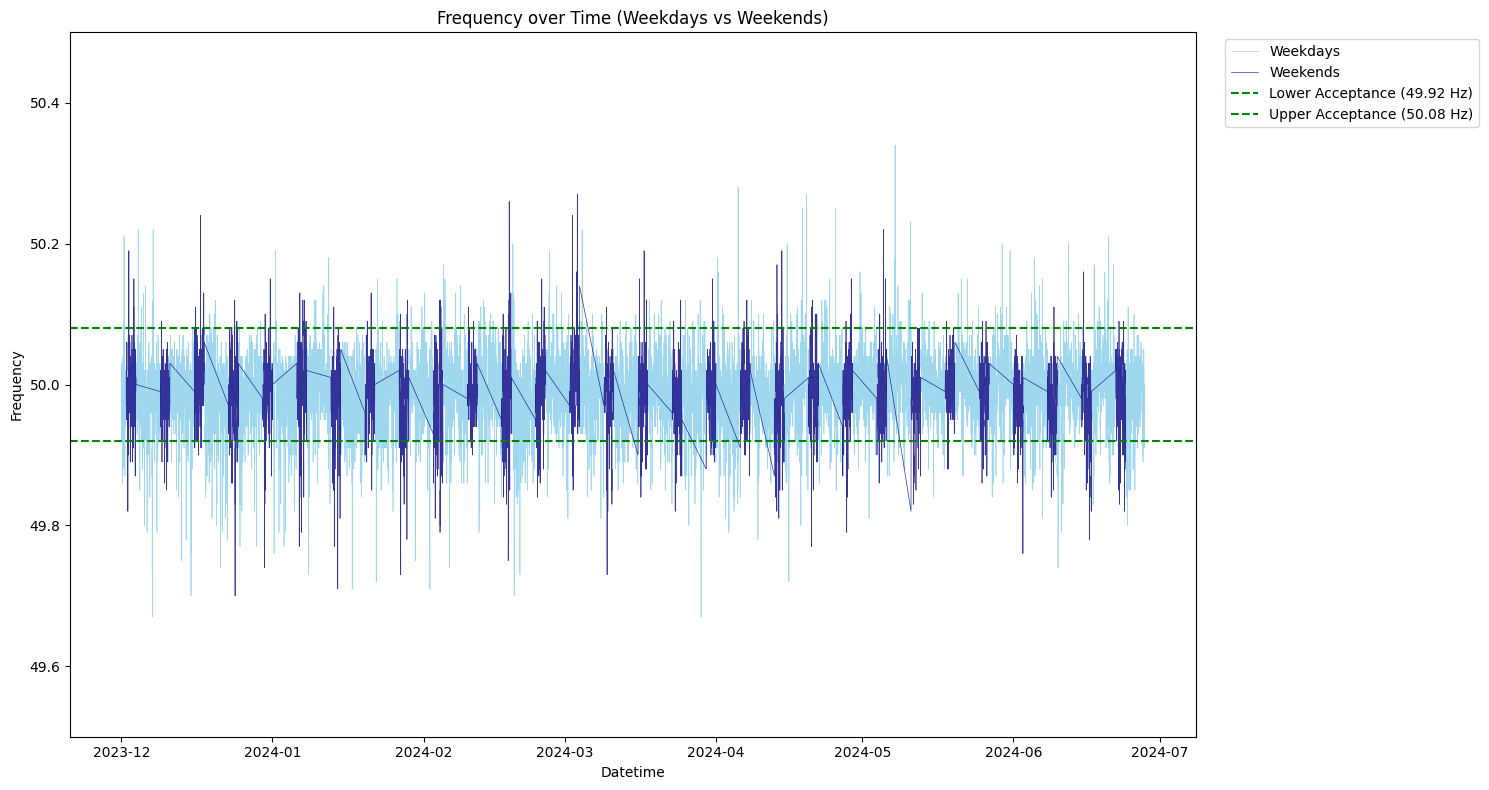

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Data_set.csv')

df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

df['is_weekend'] = df['DateTime'].dt.dayofweek.isin([5, 6])  # 5=Saturday, 6=Sunday

plt.figure(figsize=(15, 8))

weekday_data = df[~df['is_weekend']]
weekend_data = df[df['is_weekend']]

plt.plot(weekday_data['DateTime'], weekday_data['Value'],
         color='skyblue', label='Weekdays', alpha=0.8, linewidth=0.5)
plt.plot(weekend_data['DateTime'], weekend_data['Value'],
         color='navy', label='Weekends', alpha=0.8, linewidth=0.5)

plt.axhline(y=49.92, color='green', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')

plt.title('Frequency over Time (Weekdays vs Weekends)')
plt.xlabel('Datetime')
plt.ylabel('Frequency')

plt.ylim(49.5, 50.5)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()

plt.savefig('frequency_weekday_weekend_plot.png', dpi=300, bbox_inches='tight')
plt.show()

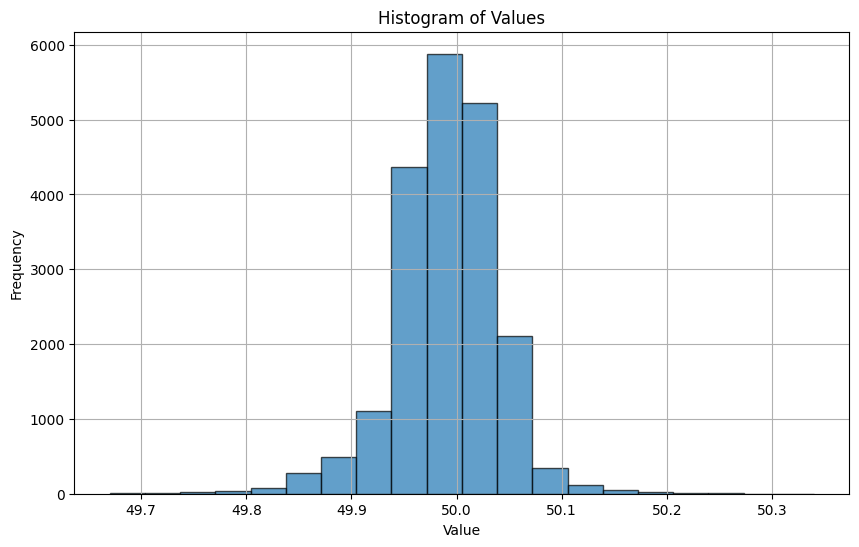

Histogram plot created for Values


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data_set.csv', encoding='ascii')

df['DateTime'] = pd.to_datetime(df['DateTime'])


plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print('Histogram plot created for Values')

                     Value
DateTime                  
2023-12-01 00:00:00  50.01
2023-12-01 00:15:00  50.02
2023-12-01 00:30:00  49.97
2023-12-01 00:45:00  50.03
2023-12-01 01:00:00  50.02
Dataframe loaded and DateTime set as index.


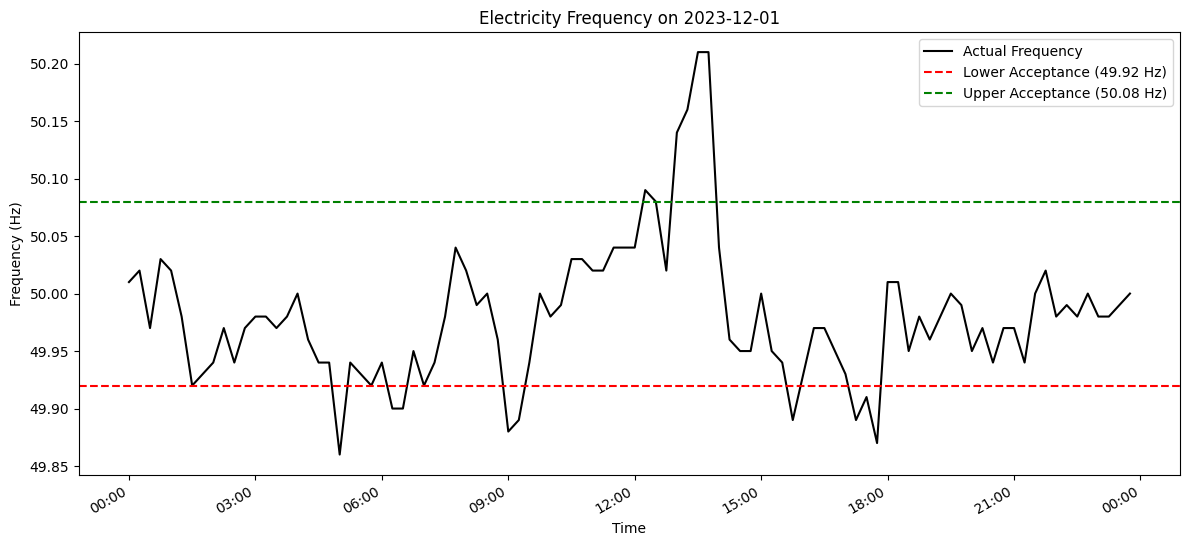

Plot for specific day ( 2023-12-01 ) complete.


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('Data_set.csv', encoding='ascii')

df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

print(df.head())
print('Dataframe loaded and DateTime set as index.')

specific_day = '2023-12-01'
df_day = df.loc[specific_day]

plt.figure(figsize=(12,6))
plt.plot(df_day.index, df_day['Value'], label='Actual Frequency', color='black')

locator = mdates.HourLocator(byhour=[0,3,6,9,12,15,18,21])
formatter = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.axhline(y=49.92, color='red', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')

plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title('Electricity Frequency on ' + specific_day)
plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

print('Plot for specific day (', specific_day, ') complete.')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 0.0021173115280847623
R-squared Score: 0.016369609110779226


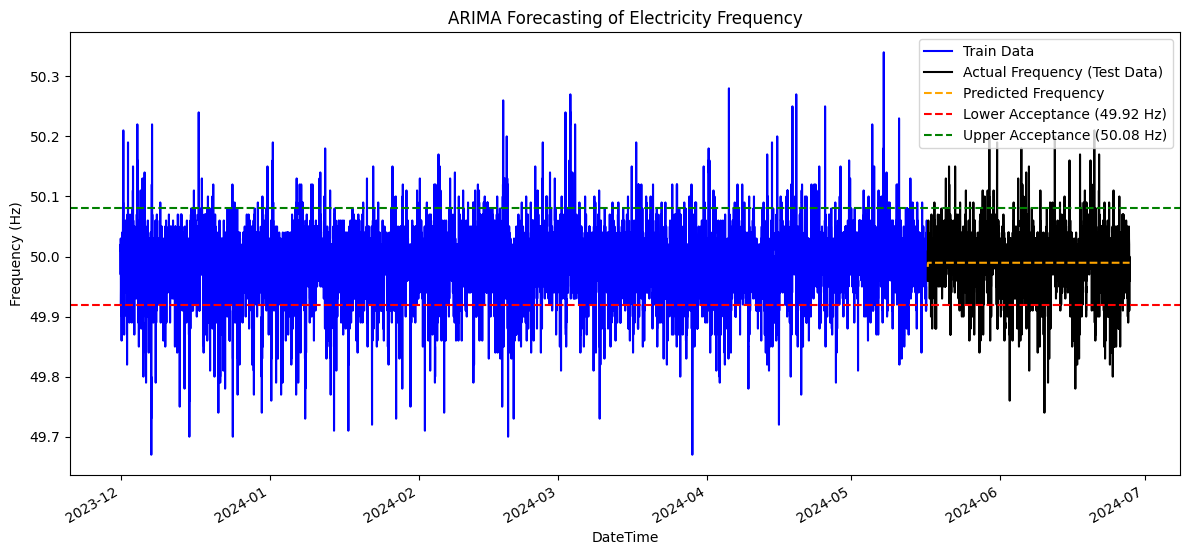

ARIMA forecasting complete.


<Figure size 1200x600 with 0 Axes>

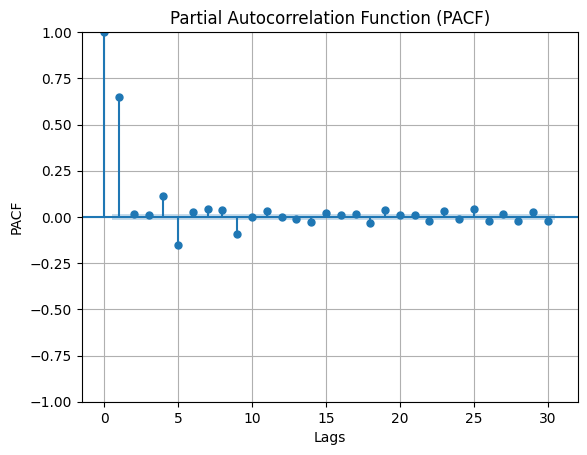

<Figure size 1200x600 with 0 Axes>

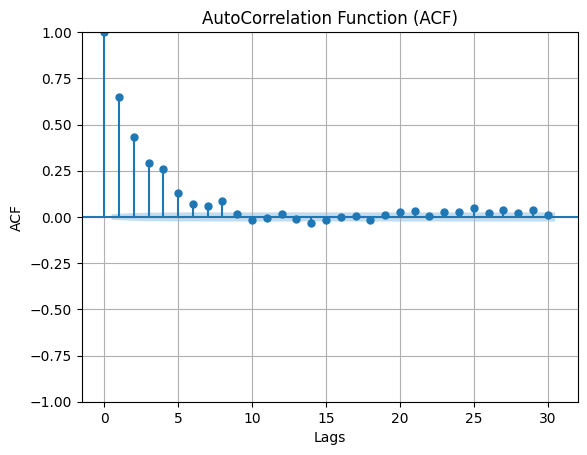

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Data_set.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.sort_values('DateTime', inplace=True)
df.set_index('DateTime', inplace=True)

series = df['Value']

split_index = int(len(series) * 0.8)
train, test = series.iloc[:split_index], series.iloc[split_index:]

model = ARIMA(train, order=(1,0,5))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

mse = mean_squared_error(test, forecast)
print('Mean Squared Error:', mse)
from sklearn.metrics import r2_score

r2 = r2_score(test, forecast)
print('R-squared Score:', -r2)

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Actual Frequency (Test Data)', color='black')
plt.plot(test.index, forecast, label='Predicted Frequency', color='orange', linestyle='--')

plt.axhline(y=49.92, color='red', linestyle='--', label='Lower Acceptance (49.92 Hz)')
plt.axhline(y=50.08, color='green', linestyle='--', label='Upper Acceptance (50.08 Hz)')

plt.xlabel('DateTime')
plt.ylabel('Frequency (Hz)')
plt.title('ARIMA Forecasting of Electricity Frequency')
plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

print('ARIMA forecasting complete.')

from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(train, lags=30, method='ols')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid()
plt.show()


from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(train, lags=30)
#plot_acf(train, lags=30, method='ols')
plt.title('AutoCorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid()
plt.show()
